In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

%matplotlib inline

<font color='yellow' size = 6>
Part I<br>
<font color='white' size = 4>
Import Data<br>
Merge in population by province (manually collected)<br>
And some initial cleaning, and checking

In [2]:
df = pd.read_csv('.\data\PatientInfo.csv')
popinfo = pd.read_csv('.\data\Population.csv')
df = pd.merge(df, popinfo, on='province')
display(df.head())
# print('\n', df.describe(), '\n')
print(df.info())

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,province_population_in_M
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,9.64
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released,9.64
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released,9.64
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released,9.64
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released,9.64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 0 to 5164
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_id                5165 non-null   int64  
 1   sex                       4043 non-null   object 
 2   age                       3785 non-null   object 
 3   country                   5165 non-null   object 
 4   province                  5165 non-null   object 
 5   city                      5071 non-null   object 
 6   infection_case            4246 non-null   object 
 7   infected_by               1346 non-null   object 
 8   contact_number            791 non-null    object 
 9   symptom_onset_date        690 non-null    object 
 10  confirmed_date            5162 non-null   object 
 11  released_date             1587 non-null   object 
 12  deceased_date             66 non-null     object 
 13  state                     5165 non-null   object 
 14  province

<font size = 4 color = 'yellow'>
# Take a look at the null's

In [3]:
missing_count = df.isnull().sum() #it's a pandas.core.series.Series
value_count = df.isnull().count() #it's a pandas.core.series.Series
missing_percentage = round(missing_count / value_count * 100,2) #the percentage of missing values, Series
missing_df = pd.DataFrame({'missing_count': missing_count, 'missing_percentage': missing_percentage}) #create a dataframe
print(missing_df)

                          missing_count  missing_percentage
patient_id                            0                0.00
sex                                1122               21.72
age                                1380               26.72
country                               0                0.00
province                              0                0.00
city                                 94                1.82
infection_case                      919               17.79
infected_by                        3819               73.94
contact_number                     4374               84.69
symptom_onset_date                 4475               86.64
confirmed_date                        3                0.06
released_date                      3578               69.27
deceased_date                      5099               98.72
state                                 0                0.00
province_population_in_M              0                0.00


<font size = 4 color = 'yellow'>
# visualize missing value

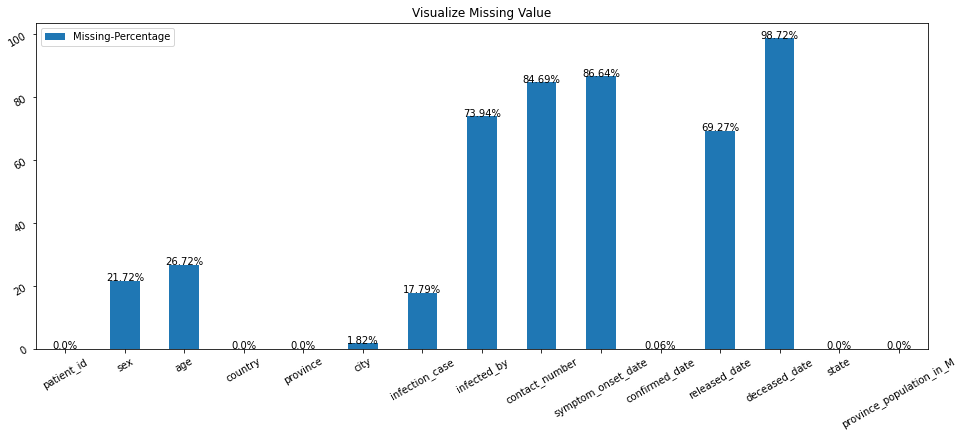

In [4]:
barchart = missing_df.plot.bar(y='missing_percentage', figsize = (16,6), label = 'Missing-Percentage')
barchart.tick_params(labelrotation=30)
plt.title('Visualize Missing Value')
for index, percentage in enumerate(missing_percentage):
    barchart.text(index, percentage, str(percentage) + '%', horizontalalignment = 'center')

In [5]:
# South Korea 2020 population is estimated at 51,269,185 people at mid year according to UN data.
SK_TTL_POP = 51269185

<font size=4 color='yellow'>
#Convert datetime<br>
<font size=4 color='white'>
A quick check on the ones don't have a confirmed date

In [6]:
df[df['confirmed_date'].isnull()]

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,province_population_in_M
4730,6011000051,female,40s,Korea,Gyeongsangbuk-do,Andong-si,etc,NaN,NaN,NaN,NaN,NaN,NaN,released,2.67
4731,6011000052,female,0s,Korea,Gyeongsangbuk-do,Andong-si,etc,NaN,NaN,NaN,NaN,NaN,NaN,released,2.67
4732,6011000053,female,10s,Korea,Gyeongsangbuk-do,Andong-si,etc,NaN,NaN,2020-04-15,NaN,NaN,NaN,released,2.67


In [7]:
df.dropna(subset=['confirmed_date'], inplace = True)
df['symptom_onset_date'] = pd.to_datetime(df['symptom_onset_date'], format = '%Y-%m-%d', errors = 'coerce')
df['confirmed_date'] = pd.to_datetime(df['confirmed_date'], format = '%Y-%m-%d')
df['released_date'] = pd.to_datetime(df['released_date'], format = '%Y-%m-%d')
df['deceased_date'] = pd.to_datetime(df['deceased_date'], format = '%Y-%m-%d')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5162 entries, 0 to 5164
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   patient_id                5162 non-null   int64         
 1   sex                       4040 non-null   object        
 2   age                       3782 non-null   object        
 3   country                   5162 non-null   object        
 4   province                  5162 non-null   object        
 5   city                      5068 non-null   object        
 6   infection_case            4243 non-null   object        
 7   infected_by               1346 non-null   object        
 8   contact_number            791 non-null    object        
 9   symptom_onset_date        688 non-null    datetime64[ns]
 10  confirmed_date            5162 non-null   datetime64[ns]
 11  released_date             1587 non-null   datetime64[ns]
 12  deceased_date       

<font size=4 color='yellow'>
# Take a look at the date range of the dataset

In [8]:
confirmed_date_min = min(df['confirmed_date'].dt.date)
confirmed_date_max = max(df['confirmed_date'].dt.date)
print(f'Earliest date of confirmed case: {confirmed_date_min}')
print(f'Latest date of confirmed case: {confirmed_date_max}')

Earliest date of confirmed case: 2020-01-20
Latest date of confirmed case: 2020-06-30


<font color='yellow' size = 6>
Part II EDA<br>

<font color='white' size = 5>
2.1 Let's look at it by age<br>
<font color='yellow' size = 4>
# Take a look at distribution by Age

In [9]:
age_dist = df['age'].fillna('NA').value_counts()
px.bar(age_dist, title = 'Patient Age distribution')

<font size = 4 color='yellow'>
# Make age numerical by cleaning out the 's' with RegEx<br>
# and pd.to_numeric

In [10]:
print(df['age'].unique())
df_by_age = df.dropna(subset=['age']).copy()

['50s' '30s' '20s' '60s' '80s' '70s' '40s' '10s' '90s' '0s' nan '100s']


In [11]:
df_by_age['age'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
df_by_age[['age']] = df_by_age[['age']].apply(pd.to_numeric)
# df_by_age = df_by_age.infer_objects()
# df_by_age.info()

<font size = 4 color = 'yellow'>
# Although most patients are 20s but...<br>
# It seems there are much more death in the older patients

c:\Users\mkof6\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



<AxesSubplot:title={'center':'isolated'}, xlabel='age'>

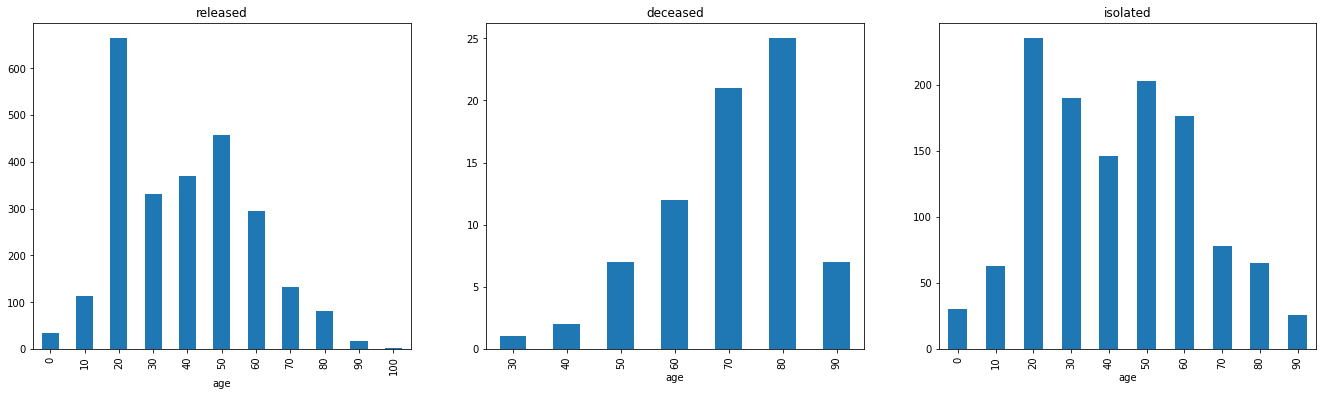

In [12]:
df_groupby_age = df_by_age.groupby(by=['state', 'age'], as_index=True)['patient_id'].count()
fig, ax = plt.subplots(1,3, figsize=(23,6))
df_groupby_age.xs('released').plot(kind = 'bar', ax = ax[0], title = 'released')
df_groupby_age.xs('deceased').plot(kind = 'bar', ax = ax[1], title = 'deceased')
df_groupby_age.xs('isolated').plot(kind = 'bar', ax = ax[2], title = 'isolated')

<font size=4 color='yellow'>
# Let's look at the mortality rate by age and see 

In [13]:
df_all_state = df_by_age.groupby(by = ['age'])['patient_id'].count()
df_only_deceased = df_by_age[df_by_age['state']=='deceased'].groupby(by = 'age')['patient_id'].count()

In [14]:
df_combined = pd.merge(df_all_state, df_only_deceased, on='age', how = 'outer').fillna(0)
df_combined.columns = ['all_state','deceased']
df_combined['mortality_rate'] = df_combined['deceased'] / df_combined['all_state']
df_combined.reset_index(inplace = True)
df_combined

,age,all_state,deceased,mortality_rate
0,0,65,0.0,0.000000
1,10,177,0.0,0.000000
2,20,899,0.0,0.000000
3,30,523,1.0,0.001912
4,40,517,2.0,0.003868
5,50,667,7.0,0.010495
6,60,482,12.0,0.024896
7,70,232,21.0,0.090517
8,80,170,25.0,0.147059
9,90,49,7.0,0.142857


<font size=4 color='yellow'>
# It does seem to be the case

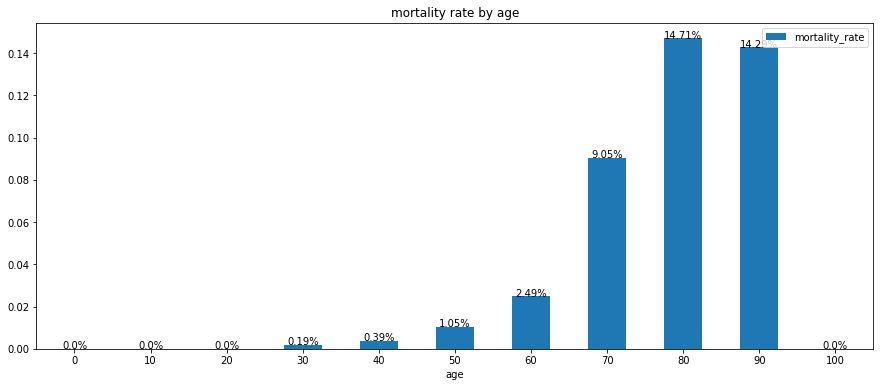

In [15]:
mortality_rate_BarChart = df_combined.plot(x='age', y = 'mortality_rate', kind = 'bar', figsize=(15,6), title = 'mortality rate by age')
mortality_rate_BarChart.tick_params(axis = 'x', labelrotation=0)
for index, percentage in enumerate(df_combined['mortality_rate']):
    percent = percentage*100
    percent = np.round(percent,2)
    mortality_rate_BarChart.text(index, percentage, str(percent) + '%', horizontalalignment = 'center')

In [16]:
age_death_corr = df_combined[['age','mortality_rate']].corr()
age_death_corr

,age,mortality_rate
age,1.00000,0.61872
mortality_rate,0.61872,1.00000


<font size=4 color='yellow'>
# The correlation between age and mortality rate is 0.62<br>
# But I should NOT assume linear relationshiphere<br>
# and I should take a look at the data first

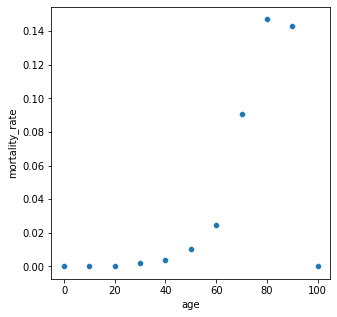

In [17]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(data = df_combined[['age','mortality_rate']], x='age', y='mortality_rate',ax=ax);

<font size=4 color='yellow'>
# AHA! I almost made a mistake by just calling out a correlation coefficient<br>
# without first looking at the data<br>
# It's actually showing an exponential relationship!

---------------------------------

<font color='white' size = 5>
2.2 Let's look at it by gender<br>
<font color='yellow' size = 4>
# Let's see if we have a binary world here<br>
# well... seems a nope here

In [18]:
print(df['sex'].unique())
print(df['state'].unique())

['male' 'female' nan]
['released' 'deceased' 'isolated']


In [19]:
total_male_count = len(df[df['sex'] == 'male'])
total_female_count = len(df[df['sex'] == 'female'])
msg1 = f'total_male_count:{total_male_count}, total_female_count:{total_female_count}'
print(msg1)

total_male_count:1825, total_female_count:2215


<font color='yellow' size = 4>
# A note here regarding Pandas groupby<br>
<font color='white' size = 3>
if as_index=True, it returns a Series --- df.groupby('sex', as_index=True).count()<br>
if as_index=False, it returns a dataframe --- df.groupby('sex', as_index=False).count()

<font color='yellow' size = 4>
# some further note on return type<br>
<font color='white' size = 3>
Bad practice... waster of computing<br>
df.groupby('sex', as_index=False).count()[['patient_id']]  <-- returns DataFrame<br>
df.groupby('sex', as_index=False).count()['patient_id']  <-- returns Series<br>
Good practice, both return a DataFrame<br>
df.groupby('sex', as_index=False)[['patient_id']].count()  <-- returns DataFrame<br>
df.groupby('sex', as_index=False)['patient_id'].count()  <-- returns DataFrame

In [20]:
df.groupby('sex', as_index=False)[['patient_id']].count()

,sex,patient_id
0,female,2215
1,male,1825


In [21]:
df[df['state']=='deceased'].groupby('sex').agg({'patient_id':np.count_nonzero})

,patient_id
sex,
female,28
male,47


In [22]:
df_deceased = df[df['state'] == 'deceased']
total_death_count = len(df_deceased)
male_death_count = len(df_deceased[df_deceased['sex'] == 'male'])
female_death_count = len(df_deceased[df_deceased['sex'] == 'female'])
msg2 = f'male_death_count:{male_death_count}, female_death_count:{female_death_count}, total_death_count:{total_death_count}'
print(msg2)

male_death_count:47, female_death_count:28, total_death_count:78


<font color='yellow' size = 4>
# Final findings on gender mortality rate<br>
# The mortality rate of male is twice that of females

In [23]:
msg3 = f'male death percentage:{male_death_count/total_male_count*100: .3f}%, female death percentage:{female_death_count/total_female_count*100: .3f}%'
print(msg1, msg2, msg3, sep='\n')

total_male_count:1825, total_female_count:2215
male_death_count:47, female_death_count:28, total_death_count:78
male death percentage: 2.575%, female death percentage: 1.264%


-------------------------

<font color='white' size = 5>
2.3 Let's look at it by location<br>
<font color='yellow' size = 4>
# It's quite exciting to find treemap in Python<br>
# Still remember that Prof. Brooks mentioned that it was not available in Python yet

In [24]:
df_grouped = df.groupby(by=['province', 'city']).agg({'patient_id':'count', 'province_population_in_M':'mean'}).rename(columns = {'patient_id':'counts'}).reset_index()
# To provide a level at the top (single root node)
df_grouped['Country'] = 'South Korea'
ncity = len(df['city'].unique())
nprovince = len(df['province'].unique())
print(f'There are {nprovince} of provinces and {ncity} of cities in the dataset')

There are 17 of provinces and 164 of cities in the dataset


<font color='white' size = 4>
A Treemap is a data visualization technique that shows hierarchical data as a set of nested rectangles<br>
vary in colors and sizes depending on some given data value.<br>
So, you can see the relationship between two items in the hierarchies through the rectangles,<br>
but you can also see the relationship between values of various components through coloration, texturing, or the like.<br>
<font color='yellow' size = 4>
Short-comings: Hard to navigate through deep structures

In [25]:
title_msg = "<b>Current Share of South Korea COVID19 Cases</b><br><sub>There are totally 17 of provinces and 164 of cities in the dataset</sub><br>"
fig = px.treemap(df_grouped, path=['Country', 'province', 'city'], values = 'counts', color = 'counts',
                color_continuous_scale='Jet', title = title_msg)
fig.update_layout(width=1200, height = 600, template='seaborn')
fig.show()

<font color='yellow' size = 4>
# One city jumped out, Gyeongsan-si under Gyeongsangbuk-do province<br>
# This could just mean that there are more population there<br>
# Unfortunately I haven't been able to find population by city in South Korea<br>
# 'counts' is encoded with both the size of the rectangle and the color<br>
# So I have to do that by provinces, even that was collected/keyed manually

In [26]:
df_grouped_by_province = df.groupby(by=['province']).agg({'patient_id':'count', 'province_population_in_M':'mean'}).reset_index().rename(columns = {'patient_id':'counts'})
# Again, to provide a level at the top (single root node)
df_grouped_by_province['Country'] = 'South Korea'

title_msg = "<b>Current Share of South Korea COVID19 Cases</b><br><sub>There are totally 17 of provinces in the dataset</sub><br>"
fig = px.treemap(df_grouped_by_province, path=['Country', 'province'], values = 'province_population_in_M', color = 'counts',
                color_continuous_scale='Jet', title = title_msg)
fig.update_layout(width=1200, height = 600, template='seaborn')
fig.show()

<font color='yellow' size = 4>
# Gyeongsangbuk-do is not a province with lots of population<br>
# and yet, it's in the top 3 by cases<br>
# Let's see Cases per Million Population by Province<br>
# Gyeongsangbuk-do is indeed 3 times higher compared to the 2nd hightest province Sejong

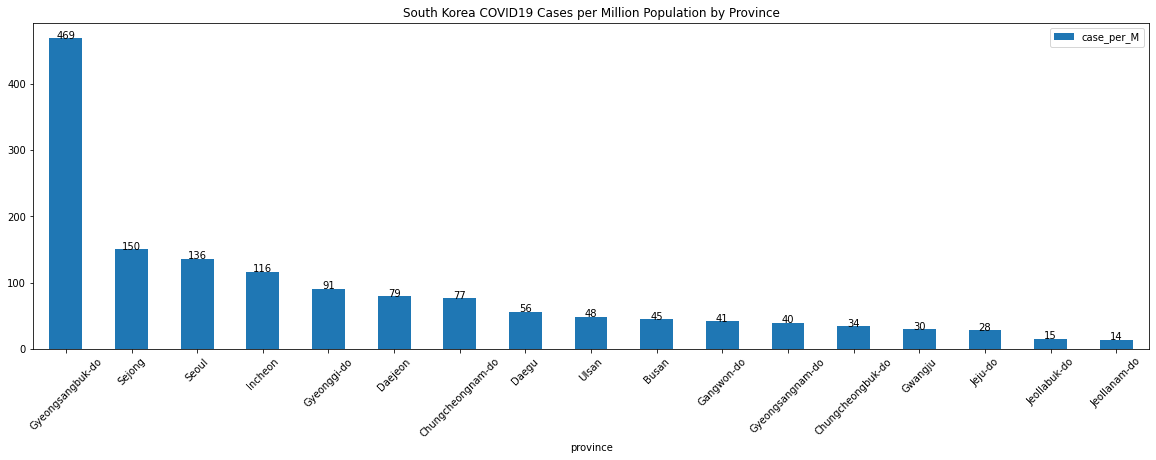

In [27]:
df_grouped_by_province['case_per_M'] = df_grouped_by_province['counts'] / df_grouped_by_province['province_population_in_M']

df_grouped_by_province.sort_values(by = ['case_per_M'], inplace = True, ascending=False)

barchart = df_grouped_by_province.plot(x = 'province', y = 'case_per_M', kind = 'bar', figsize = (20,6), 
                                        title = 'South Korea COVID19 Cases per Million Population by Province')
barchart.tick_params(axis = 'x', labelrotation=45)
for index, num in enumerate(df_grouped_by_province['case_per_M']):
    num_rounded_int = int(np.round(num))
    barchart.text(index, num, str(num_rounded_int), horizontalalignment = 'center')

In [28]:
df_deceased_grouped = df_deceased.groupby(by=['province', 'city']) \
        .agg({'patient_id':'count', 'province_population_in_M':'mean'}) \
        .reset_index().rename(columns = {'patient_id':'counts'})

df_deceased_grouped['Country'] = 'South Korea'
fig = px.treemap(df_deceased_grouped, path=['Country', 'province', 'city'], values = 'counts', color = 'counts',
                color_continuous_scale='matter', title = 'Current Share of South Korea COVID19 Death')
fig.update_layout(width=1200, height = 600, template='seaborn')
fig.show()

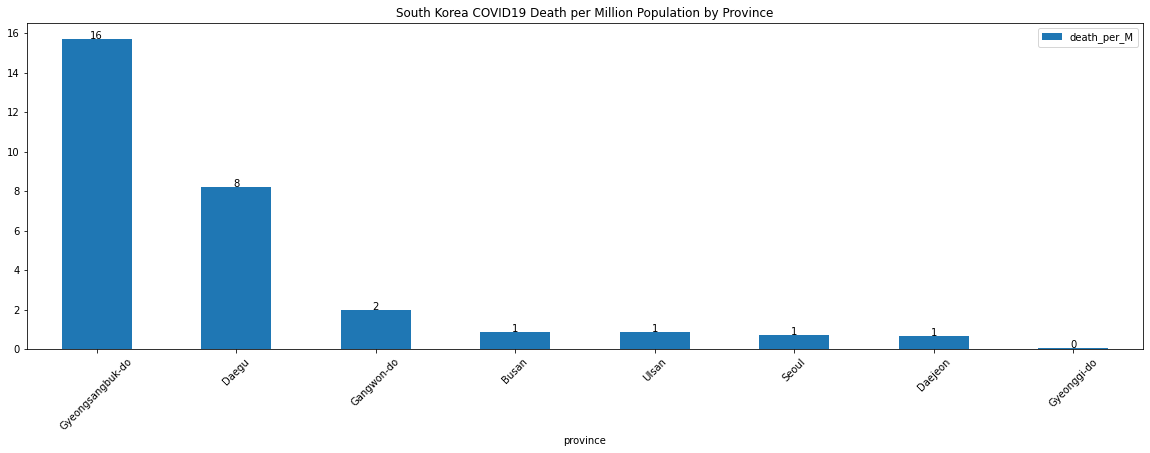

In [30]:
df_deceased_groupby_province = df_deceased.groupby(by=['province']) \
        .agg({'patient_id':'count', 'province_population_in_M':'mean'}) \
        .reset_index().rename(columns = {'patient_id':'counts'})

df_deceased_groupby_province['death_per_M'] = df_deceased_groupby_province['counts'] / df_deceased_groupby_province['province_population_in_M']

df_deceased_groupby_province.sort_values(by = ['death_per_M'], inplace = True, ascending=False)

barchart = df_deceased_groupby_province.plot(x = 'province', y = 'death_per_M', kind = 'bar', figsize = (20,6), 
                                        title = 'South Korea COVID19 Death per Million Population by Province')
barchart.tick_params(axis = 'x', labelrotation=45)
for index, num in enumerate(df_deceased_groupby_province['death_per_M']):
    num_rounded_int = int(np.round(num))
    barchart.text(index, num, str(num_rounded_int), horizontalalignment = 'center')

In [29]:
df_daily_confirm = df.groupby(by=['confirmed_date']).count()['patient_id'].reset_index(name='ConfirmedCases')
df_daily_confirm.rename(columns={'confirmed_date':'Date'}, inplace = True)
df_daily_confirm

,Date,ConfirmedCases
0,2020-01-20,1
1,2020-01-23,1
2,2020-01-26,1
3,2020-01-27,1
4,2020-01-30,4
...,...,...
143,2020-06-26,40
144,2020-06-27,48
145,2020-06-28,38
146,2020-06-29,25


In [30]:
df_daily_death = df_deceased.groupby(by=['deceased_date']).count()['patient_id'].reset_index(name='Death')
df_daily_death.rename(columns={'deceased_date':'Date'}, inplace = True)

In [31]:
df_daily = pd.merge(df_daily_confirm, df_daily_death, on=['Date'], how = 'outer')
df_daily.fillna(0, inplace=True)
df_daily

,Date,ConfirmedCases,Death
0,2020-01-20,1,0.0
1,2020-01-23,1,0.0
2,2020-01-26,1,0.0
3,2020-01-27,1,0.0
4,2020-01-30,4,0.0
...,...,...,...
143,2020-06-26,40,0.0
144,2020-06-27,48,0.0
145,2020-06-28,38,0.0
146,2020-06-29,25,0.0


In [32]:
def draw_with_rolling_avg(df, x, y1, y2, days = 7):
    df['cases_roll_avg'] = df[y1].rolling(days).mean()
    df['deaths_roll_avg'] = df[y2].rolling(days).mean()
    fig, ax = plt.subplots(figsize=(23,12))
    sns.lineplot(x=df[x], y = df[y1], ax = ax, lw = 0.3, color = '#4285F4', label='Daily Cases', legend=False);
    sns.lineplot(x=df[x], y = df['cases_roll_avg'], ax = ax, lw = 3, color = '#4285F4', label='7day rolling avg Cases', legend=False);
    ax2 = ax.twinx()
    sns.lineplot(x=df[x], y = df[y2], ax = ax2, lw = 0.3, color = '#EA4335', label='Daily Death', legend=False)
    sns.lineplot(x=df[x], y = df['deaths_roll_avg'], ax = ax2, lw = 3, color = '#EA4335', label='7day rolling avg Death', legend=False)
    ax.set_title('South Korea: Daily Cases & Death\nwith 7-Day Rolling Averages', fontsize = 20)
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')


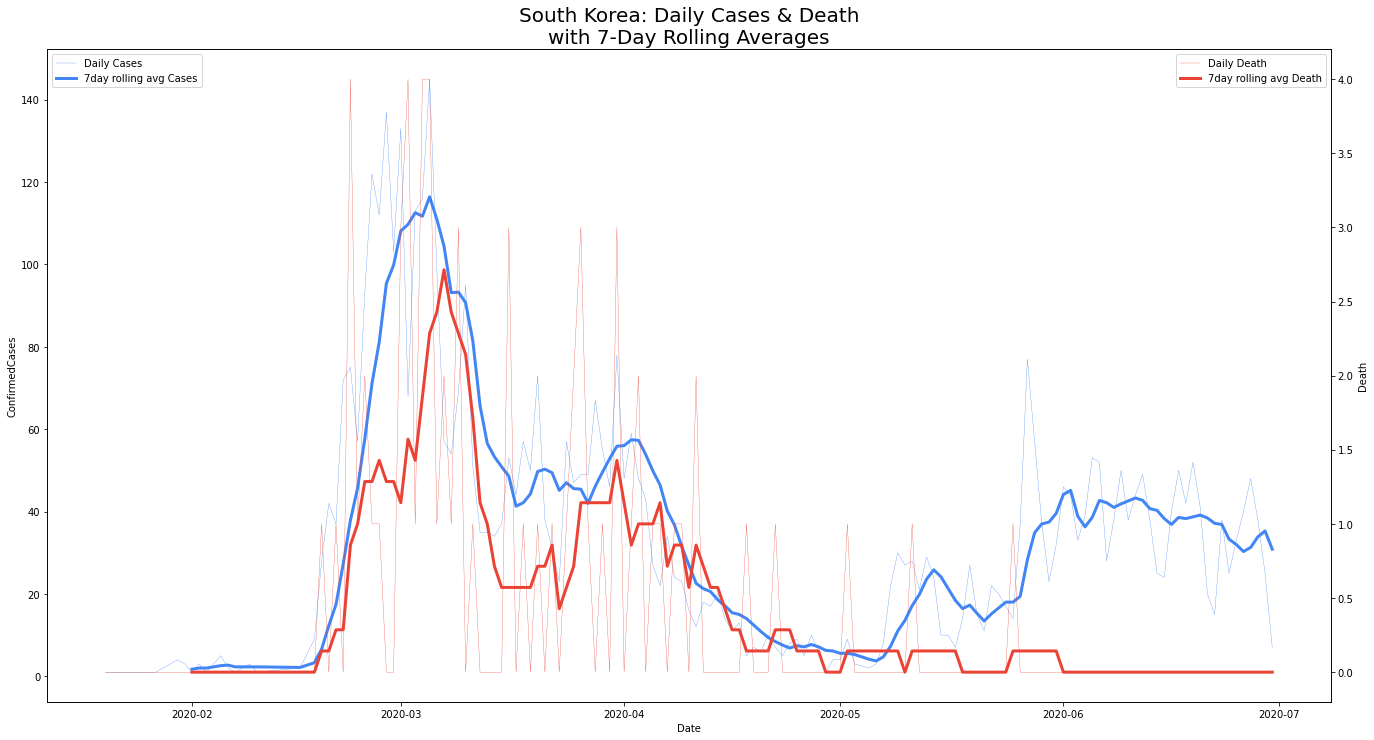

In [33]:
draw_with_rolling_avg(df_daily, 'Date', 'ConfirmedCases', 'Death', days = 7)

In [34]:
region_df = pd.read_csv('.\data\Region.csv')
region_df.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [35]:
region_df.corr()

,code,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
code,1.000000,-0.419027,0.122203,0.144407,0.134610,0.133138,-0.239473,0.567764,0.643314,0.095244
latitude,-0.419027,1.000000,-0.224579,0.076126,0.079424,0.077213,-0.090529,-0.296788,-0.390378,0.096744
longitude,0.122203,-0.224579,1.000000,-0.066627,-0.068006,-0.064224,-0.009302,0.093870,0.096800,-0.071889
elementary_school_count,0.144407,0.076126,-0.066627,1.000000,0.998604,0.995520,0.074542,-0.093582,-0.086028,0.987042
kindergarten_count,0.134610,0.079424,-0.068006,0.998604,1.000000,0.993414,0.080832,-0.105287,-0.096907,0.986783
university_count,0.133138,0.077213,-0.064224,0.995520,0.993414,1.000000,0.081918,-0.105257,-0.100359,0.989203
academy_ratio,-0.239473,-0.090529,-0.009302,0.074542,0.080832,0.081918,1.000000,-0.627524,-0.578918,0.089914
elderly_population_ratio,0.567764,-0.296788,0.093870,-0.093582,-0.105287,-0.105257,-0.627524,1.000000,0.975789,-0.114462
elderly_alone_ratio,0.643314,-0.390378,0.096800,-0.086028,-0.096907,-0.100359,-0.578918,0.975789,1.000000,-0.111793
nursing_home_count,0.095244,0.096744,-0.071889,0.987042,0.986783,0.989203,0.089914,-0.114462,-0.111793,1.000000


In [36]:
region_only_df = region_df[region_df['province'] == region_df['city']].copy()
region_only_df

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
26,11000,Busan,Busan,35.179884,129.074796,304,408,22,1.40,18.41,8.6,6752
43,12000,Daegu,Daegu,35.872150,128.601783,229,355,11,1.62,15.78,7.5,5083
52,13000,Gwangju,Gwangju,35.160467,126.851392,155,312,17,2.38,13.57,6.4,2852
58,14000,Incheon,Incheon,37.456188,126.705920,250,403,7,1.27,13.20,5.8,4497
69,15000,Daejeon,Daejeon,36.350621,127.384744,148,260,15,1.49,13.65,5.8,2984
75,16000,Ulsan,Ulsan,35.539797,129.311538,119,200,4,2.21,11.76,5.2,1801
81,17000,Sejong,Sejong,36.480132,127.289021,48,60,3,1.78,9.48,3.8,491
82,20000,Gyeonggi-do,Gyeonggi-do,37.275119,127.009466,1277,2237,61,1.60,12.63,5.2,20491
114,30000,Gangwon-do,Gangwon-do,37.885369,127.729868,349,368,18,1.42,19.89,9.8,2519


In [37]:
region_only_df = pd.merge(region_only_df, popinfo, on='province')[['province', 'elementary_school_count','kindergarten_count','university_count','province_population_in_M']]
region_only_df

,province,elementary_school_count,kindergarten_count,university_count,province_population_in_M
0,Seoul,607,830,48,9.64
1,Busan,304,408,22,3.37
2,Daegu,229,355,11,2.43
3,Gwangju,155,312,17,1.49
4,Incheon,250,403,7,2.95
5,Daejeon,148,260,15,1.50
6,Ulsan,119,200,4,1.14
7,Sejong,48,60,3,0.34
8,Gyeonggi-do,1277,2237,61,13.30
9,Gangwon-do,349,368,18,1.52


In [38]:
region_only_df.corr()

,elementary_school_count,kindergarten_count,university_count,province_population_in_M
elementary_school_count,1.000000,0.981118,0.915748,0.894961
kindergarten_count,0.981118,1.000000,0.893019,0.909454
university_count,0.915748,0.893019,1.000000,0.909163
province_population_in_M,0.894961,0.909454,0.909163,1.000000
